### Two sum

Given an array of integers `nums` and an integer `target`, return indices of the two numbers such that they add up to target.

You may assume that each input would have **exactly one solution**, and you may not use the same element twice.

You can return the answer in any order.


**Example 1:**
```
Input: nums = [2,7,11,15], target = 9
Output: [0,1]
Output: Because nums[0] + nums[1] == 9, we return [0, 1].
```
 
**Example 2:**
```
Input: nums = [3,2,4], target = 6
Output: [1,2]
```

**Example 3:**
```
Input: nums = [3,3], target = 6
Output: [0,1]
```
 
**Constraints:**

- `2 <= nums.length <= 10^3`
- `-10^9 <= nums[i] <= 10^9`
- `-10^9 <= target <= 10^9`
- **Only one valid answer exists.**

### Naive solution

In [7]:
def twoSum(nums, target):
    for i,x in enumerate(nums):
        for j,y in enumerate(nums):
            if i != j and target == x + y:
                return [i, j]

In [8]:
assert twoSum([2,7,11,15], 9) == [0,1]
assert twoSum([3,2,4], 6) == [1,2]
assert twoSum([3,3], 6) == [0,1]

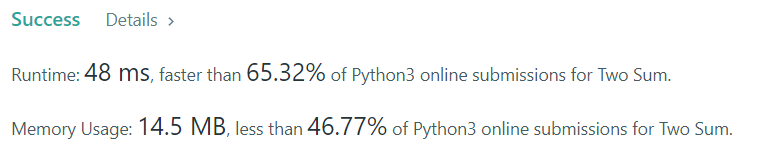

Time complexity: $O(n^2)$

### Instructor's solution: Hash table method

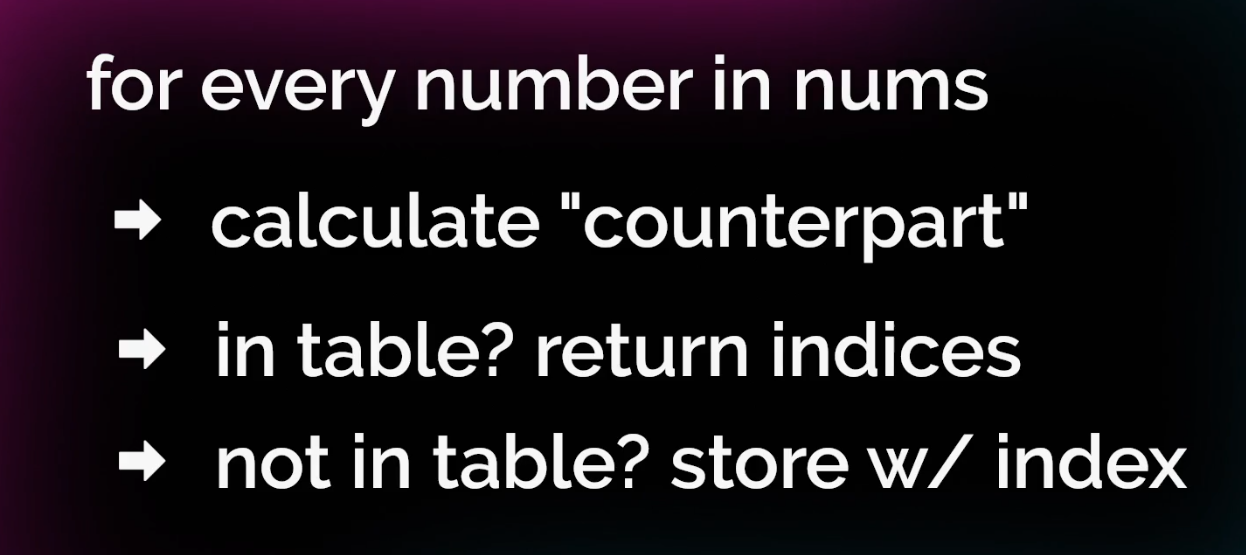

In [21]:
def twoSum(nums, target):
    ht = {}
    for i, num in enumerate(nums):
        want = target - num
        if want in ht:
            return [i, ht[want]]
        else:
            ht[num] = i

In [23]:
twoSum([2,7,11,15], 9)

[1, 0]

In [25]:
assert twoSum([2,7,11,15], 9) == [0,1] or twoSum([2,7,11,15], 9) == [1,0] 
assert twoSum([3,2,4], 6) == [1,2] or twoSum([3,2,4], 6) == [2,1]
assert twoSum([3,3], 6) == [0,1] or twoSum([3,3], 6) == [1,0]

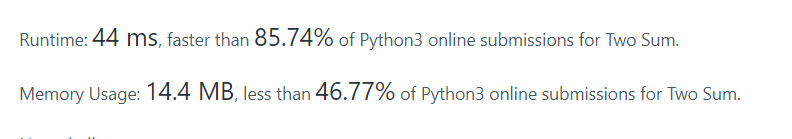

**Time complexity:** $O(n)$

**Space complexity:** $O(n)$

### Profiling

In [1]:
from typing import List

from utils.profiler import time_this, timed_report
from utils.profiler import ExponentialRange
import numpy as np

import gc

In [2]:
@time_this(lambda *args, **kwargs: len(args[0]))
def twoSum_1(nums, target):
    for i,x in enumerate(nums):
        for j,y in enumerate(nums):
            if i != j and target == x + y:
                return [i, j]

In [3]:
@time_this(lambda *args, **kwargs: len(args[0]))
def twoSum_2(nums, target):
    ht = {}
    for i, num in enumerate(nums):
        want = target - num
        if want in ht:
            return [i, ht[want]]
        else:
            ht[num] = i

In [4]:
def ordered_numeric_list(n: int) -> List[float]:
    return sorted(list(np.random.random(n)))

twoSum_1
    n   = 100 values
    t   = 4.105 ms
    n/t = 24.3588 values per ms

twoSum_1
    n   = 1000 values
    t   = 511.541 ms
    n/t = 1.9549 values per ms

twoSum_2
    n   = 100 values
    t   = 0.064 ms
    n/t = 1567.3981 values per ms

twoSum_2
    n   = 1000 values
    t   = 1.114 ms
    n/t = 897.5049 values per ms

twoSum_2
    n   = 10000 values
    t   = 8.131 ms
    n/t = 1229.8913 values per ms

twoSum_2
    n   = 100000 values
    t   = 99.142 ms
    n/t = 1008.6573 values per ms

twoSum_2
    n   = 1000000 values
    t   = 1118.851 ms
    n/t = 893.774 values per ms

   function  n_values  t_milliseconds  values_per_ms
0  twoSum_1       100           4.105        24.3588
1  twoSum_1      1000         511.541         1.9549
2  twoSum_2       100           0.064      1567.3981
3  twoSum_2      1000           1.114       897.5049
4  twoSum_2     10000           8.131      1229.8913
5  twoSum_2    100000          99.142      1008.6573
6  twoSum_2   1000000        111

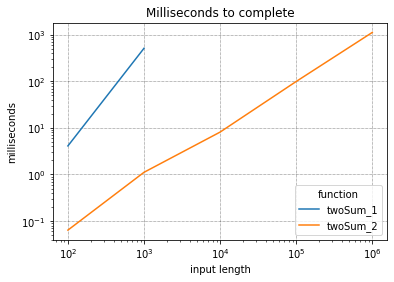

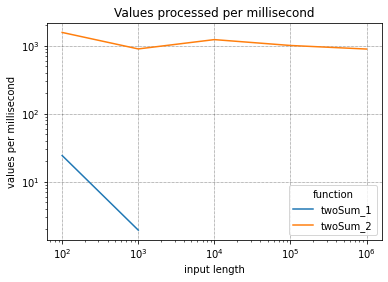

In [5]:
exp_range = ExponentialRange(2, 7, 1)
values = ordered_numeric_list(exp_range.max)

with timed_report():
    for i in exp_range.iterator(3):
        twoSum_1(values[:i], 100)
        gc.collect()

    for i in exp_range.iterator(6):
        twoSum_2(values[:i], 100)
        gc.collect()